Laboratory #1: An Introduction to the Numerical Solution of Differential Equations: Discretization
=============================================

John M. Stockie

1. Objectives
==========

The examples and exercises in this lab are meant to illustrate the
limitations of analytical solution techniques, using several
differential equation models for simple physical systems. This is the
prime motivation for the use of numerical methods.

After completing this lab, you will understand the process of
*discretizing* a continuous problem, and be able to derive a simple
finite difference approximation for an ordinary or partial differential
equation. The examples will also introduce the concepts of *accuracy*
and *stability*, which will be discussed further in the .

Specifically you will be able to:

-   Define the term or identify: Ordinary Differential Equation, Partial
    Differential Equation, Linear equation, Non-linear equation, Initial
    value problem,Boundary value problem, Open Domain, and Closed
    Domain.

-   Define the term, identify or perform: Forward difference
    discretization, Backward difference discretization, and Centre
    difference discretization.

-   Define the term: Interpolation, Convergence, and Instability.

-   Define the term or perform: Linear interpolation.


2. Readings
========

There is no required reading for this lab, beyond the contents of the
lab itself. However, if you would like additional background on any of
the following topics, then refer to the sections indicated below:

-   <span>**Differential Equations:**</span>

    -    [Strang (1986)](#Ref:Strang), Chapter 6 (ODE’s).

    -    [Boyce and DiPrima (1986)](#Ref:BoyceDiPrima) (ODE’s and PDE’s).

-   <span>**Numerical Methods:**</span>

    -    [Strang (1986)](#Ref:Strang), Section 5.1.

    -    [Garcia (1994)](#Ref:Garcia), Sections 1.4–1.5, Chapter 2 (a basic introduction to
        numerical methods for problems in physics).

    -    [Boyce and DiPrima (1986)](#Ref:BoyceDiPrima), Sections 8.1–8.5, 8.7, 8.8.

*Running Code Cells*
-------------------

The next cell in this notebook is a code cell.  Run it by selecting it and hitting ctrl enter, or by selecting it and hitting the run button (arrow to right)

In [5]:
# import plotting package and numerical python package for use in examples later
import matplotlib.pyplot as plt
# make the plots happen inline
% matplotlib inline  
import numpy as np

# import the quiz script
import quiz

3. Introduction: Why bother with numerical methods? 
================================================
[lab1:sec:intro]: <#3-Introduction:-Why-bother-with-numerical-methods?> "Intro"

In introductory courses in ordinary and partial differential equations
(ODE’s and PDE’s), many analytical techniques are introduced for
deriving solutions. These include the methods of undetermined
coefficients, variation of parameters, power series, Laplace transforms,
separation of variables, Fourier series, and phase plane analysis, to
name a few. When there are so many analytical tools available, one is
led to ask:

> *Why bother with numerical methods at all?*

The fact is that the class of problems that can be solved analytically
is *very small*. Most differential equations that model physical
processes cannot be solved explicitly, and the only recourse available
is to use a numerical procedure to obtain an approximate solution of the
problem.

Furthermore, even if the equation can be integrated to obtain a closed
form expression for the solution, it may sometimes be much easier to
approximate the solution numerically than to evaluate it analytically.

In the following two sections, we introduce two classical physical
models, seen in most courses in differential equations. Analytical
solutions are given for these models, but then seemingly minor
modifications are made which make it difficult (if not impossible) to
calculate actual solution values using analytical techniques. The
obvious alternative is to use numerical methods.

3.1 Ordinary Differential Equations
---------------------------------
<!--- {#lab1:sec:odes} -->
[lab1:sec:odes]: <#3.1-Ordinary-Differential-Equations> "ODES"

In order to demonstrate the usefulness of numerical methods, let’s start
by looking at an example of a *first-order initial value problem* (or
*IVP*). In their most general form, these equations look like

<div id='lab1:eq:modelode'>
(Model ODE)
$$\begin{array}{c}
    {\displaystyle \frac{dy}{dt} = f(y,t),} \\
    \; \\
    y(0) = y_0, 
  \end{array}$$
</div>

where

-   $t$ is the *independent variable* (in many physical systems, which
    change in time, $t$ represents time);

-   $y(t)$ is the unknown quantity (or *dependent variable*) that we
    want to solve for;

-   $f(y,t)$ is a known function that can depend on both $y$ and $t$;
    and

-   $y_0$ is called the *initial value* or *initial condition*, since it
    provides a value for the solution at an initial time, $t=0$ (the
    initial value is required so that the problem has a unique
    solution).

This problem involves the first derivative of the solution, and also
provides an initial value for $y$, and hence the name “first-order
initial value problem”.

Under certain very general conditions on the right hand side function
$f$, we know that there will be a unique solution to the problem .
However, only in very special cases can we actually write down a
closed-form expression for the solution.

In the remainder of this section, we will leave the general equation,
and investigate a specific example related to heat conduction. It will
become clear that it is the problems which *do not have exact solutions*
which are the most interesting or meaningful from a physical standpoint.

*Example One*
------------
<!--- {#lab1:exm:conduction} -->
[lab1:exm:conduction]: <#Example-One> "Example 1"

> Consider a small rock, surrounded by air or water,
which gains or loses heat only by conduction with its surroundings
(there are no radiation effects). If the rock is small enough, then we
can ignore the effects of diffusion of heat within the rock, and
consider only the flow of heat through its surface, where the rock
interacts with the surrounding medium.

> It is well known from experimental observations that the rate at which
the temperature of the rock changes is proportional to the difference
between the rock’s surface temperature, $T(t)$, and the *ambient
temperature*, $T_a$ (the ambient temperature is simply the temperature
of the surrounding material, be it air, water, …). This relationship is
expressed by the following ordinary differential equation
<div id='lab1:eq:conduction1d'>
(Conduction 1d)
$$%    \textcolor[named]{Red}{\frac{dT}{dt}} = -\lambda \,
%    \textcolor[named]{Blue}{(T-T_a)} .
    \underbrace{\frac{dT}{dt}}_{\begin{array}{c} 
                                \mbox{rate of change}\\
                                \mbox{of temperature}
                                \end{array}}
    = -\lambda \underbrace{(T-T_a)}_{\begin{array}{c} 
                                \mbox{temperature}\\
                                \mbox{difference}
                                \end{array}} .$$
</div>
    
>and is commonly known as *Newton’s
Law of Cooling*. (The parameter $\lambda$ is defined to be
$\lambda = \mu A/cM$, where $A$ is the surface area of the rock, $M$ is
its mass, $\mu$ its thermal conductivity, and $c$ its specific heat.)

Conduction Quiz 
--------------

$\lambda$ is positive? True or False?

In the following, replace 'xxxx' by 'True', 'False', 'Hint 1' or 'Hint 2' and run the cell ([how to](#Running-Code-Cells))

In [3]:
print (quiz.conduction_quiz(answer = 'xxxx'))

Acceptable answers are 'True', 'False', 'Hint 1' or 'Hint 2'


If we assume that $\lambda$ is a constant, then the solution to this
equation is given by 

<div id='lab1:eq:conduction-soln'>
(Conduction solution)
$$T(t) = T_a + (T(0)-T_a)e^{-\lambda t},$$
</div>

where $T(0)$ is the initial temperature.

**Mathematical Note:** Details of the solution can be found in the [Appendix](#Solution-to-the=Heat-Conduction-Equation)


In order to obtain realistic value of the parameter $\lambda$, let our
“small” rock be composed of granite, with mass of $1\;gram$, which
corresponds to a $\lambda \approx 10^{-5}\;sec^{-1}$.

Sample solution curves are given in Figure [Conduction](#lab1:fig:conduction).

<div id='lab1:fig:conduction'>
![Plot of solution curves $T(t)$ for $T_0=-10,15,20,30$; parameter
values: $\lambda=10^{-5}$, $T_a=20$.](conduction/conduction.png) 
Figure One, Conduction: Plot of solution curves $T(t)$ for $T_0=-10,15,20,30$; parameter
values: $\lambda=10^{-5}$, $T_a=20$)
</div>

##Demo: Conduction
[lab1:demo:conduction]: <#Demo:-Conduction> "Conduction Demo"

Here is an interactive example that investigates the behaviour of the solution.

The next cell is the function that does the calculation and plotting.  You need to run this cell ([how to](#Running-Code-Cells)) to load it.  Loading it does not run the function.  See the cell after for next instructions.

In [42]:
def lab1_temperature(Ta = 20, To = np.array([-10., 10., 20., 30.]), la = 0.00001):
    """
    Script to plot the exponential decay of temperature of four objects
    with different initial temperature in a single ambient temperature.

     Example usage, use default values:

     >> lab1_temperature()
    
    Example usage, set Ta=10, To=(-5, 5, 10, 15) and la (lambda)= 0.0002:

     >> lab1_temperature(10, array([-5., 5., 10., 15.]), la = 0.0002)
     
    Ta is the ambient temperature (Celcius)
    To is the initial temperature (four different cases) (Celcius)
    la is lambda, the time constant of equilibriations (1/second)

    """
    
    # set the time scale (seconds)
    t = np.arange(0., 400000., 100.)

    # calculate the temperatures with time for the different initial temperatures
    T = np.zeros((To.shape[0], t.shape[0]))
    for i, Tinitial in enumerate(To):
        T[i,:] = Ta + (Tinitial - Ta) * np.exp(-la * t)

    # plot the temperatures in hours
    t=t/3600.
    for i, Tinitial in enumerate(To):
        plt.plot(t, T[i], label="To = %s" % Tinitial)
        
    # label axes    
    plt.xlabel('time (hours)')
    plt.ylabel('temperature (deg C)')

    # add a legend
    plt.legend(loc="lower right")

You need to call the function. Simpliest call is next cell. 

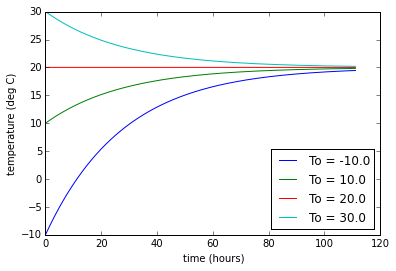

In [43]:
# simple call to temperature demo
lab1_temperature()

After running as is try changing To = To (the initial temperature), Ta = Ta (the ambient temperature) or la = λ (the effective conductivity) to investigate changes in the solution.

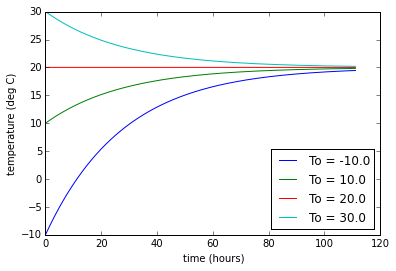

In [45]:
# setting different values 
# (note this uses the defaults again as written, you should change the values)
lab1_temperature(Ta = 20, To = np.array([-10., 10., 20., 30.]), la = 0.00001)

*Example Two*
------------
<!--- {#lab1:exm:conduction-nonlinear} -->
[lab1:exm:conduction-nonlinear]: <#Example-Two> "Example 2"

> Suppose that the rock in the previous
example has a $\lambda$ which is *not* constant. For example, if that
the rock is made of a material whose specific heat varies with the
temperature or time, then $\lambda$ can be a function of $T$ or $t$.
This might happen if the material composing the rock undergoes a phase
transition at a certain critical temperature (for example, a melting ice
pellet). The problem is now a *non-linear* one, for which analytical
techniques may or may not provide a solution.

> If $\lambda=\lambda(T)$, a function of temperature only, then the exact
solution may be written as
$$T(t) = T_a + \exp{\left[-\int^{t}_{0} \lambda(T(s))ds \right]},$$
which involves an integral that may or may not be evaluated
analytically, in which case we can only approximate the integral.
Furthermore, if $\lambda$ is a function of both $T$ and $t$ which is
*not separable* (cannot be written as a product of a function of $T$ and
$t$), then we may not be able to write down a closed form for the
solution at all, and we must resort to numerical methods to obtain a
solution.

> Even worse, suppose that we don’t know $\lambda$ explicitly as a
function of temperature, but rather only from experimental measurements
of the rock (see Figure [Table](#lab1:fig:table) for an example). 

|    i   | Temperature ($T_i$)   |    Measured $\lambda_i$  |
|    -   | :------------------:  |    :-------------------: |
|    0   |       -5.0            |       2.92 |
|    1   |       -2.0            |       1.59 |
|    2   |       1.0             |       1.00 |
|    3   |       4.0             |       2.52 |
|    4   |       7.0             |       3.66 |   
|    5   |      10.0             |       4.64 |

> <div id='lab1:fig:table'>
![A rock with $\lambda$ known only at a sequence of discrete temperature
values, from experimental measurements. The function $\lambda(T)$ can be
represented approximately using linear interpolation (and the resulting
approximate function can then be used to solve the problem
numerically).](table/table-interp.png)
Figure Two, Table: A rock with $\lambda$ known only at a sequence of discrete temperature
values, from experimental measurements. The function $\lambda(T)$ can be
represented approximately using linear interpolation (and the resulting
approximate function can then be used to solve the problem
numerically).
</div>

>Then there is
no way to express the rock’s temperature as a function, and analytical
methods fail us, since we do not know the values at points between the
given values. One alternative is to approximate $\lambda$ at
intermediate points by joining successive points with straight lines
(this is called *linear interpolation*), and then use the resulting
function in a numerical scheme for computing the solution.

As the above example demonstrates, even for a simple ODE such as [1-d conduction](#lab1:eq:conduction1d), there
are situations where analytical methods are inadequate.

3.2 Partial Differential Equations
------------------------------

*Example Three*
--------------
[lab1:exm:diffusion1d]: <#Example-Three> "Example 3"

> The rock in [Example One](#Example-One) was
considered to be small enough that the effects of heat diffusion in the
interior were negligible in comparison to the heat lost by conduction
through its surface. In this example, consider a rock that is *not
small*, and whose temperature changes are dominated by internal
diffusion effects. Therefore, it is no longer possible to ignore the
spatial dependence in the problem.

> For simplicity, we will add spatial dependence in one direction only,
which corresponds to a “one-dimensional rock”, or a thin rod. Assume
that the rod is insulated along its sides, so that heat flows only along
its length, and possibly out the ends (see Figure [Rod](#lab1:fig:rock-1d)).

> <div id='lab1:fig:rock-1d'>
![A thin rod can be thought of as a model for a one-dimensional
rock.](conduction/rod.png)
Figure Three, Rod: A thin rod can be thought of as a model for a one-dimensional
rock.
</div>

> Consequently, the temperature varies only with position, $x$, and time,
$t$, and can be written as a function $u(x,t)$. The temperature in the
rod is governed by the following PDE $$u_t = \alpha^2 u_{xx},$$ for
which we have to provide an initial temperature $$u(x,0) = u_0(x),$$ and
boundary values $$u(0,t)=u(1,t)=0,$$ where

> -   $\alpha^2$ is the *thermal diffusivity* of the material,

> -   $u_0(x)$ is the initial temperature distribution in the rod, and

> -   the boundary conditions indicate that the ends of the rod are held
    at constant temperature, which we’ve assumed is zero.

> Thermal diffusivity is a quantity that depends only on the material from
which the bar is made. It is defined by
$$\alpha^2 = \frac{\kappa}{\rho c},$$ where $\kappa$ is the thermal
conductivity, $\rho$ is the density, and $c$ is the specific heat. A
typical value of the thermal diffusivity for a granite bar is
$0.011\;cm^2/sec$, and $0.0038\;cm^2/sec$ for a bar made of brick.

> Using the method of *separation of variables*, we can look for a
temperature function of the form $u(x,t)=X(x) \cdot T(t)$, which leads
to the infinite series solution
$$u(x,t) = \sum_{n=1}^\infty b_n e^{-n^2\pi^2\alpha^2 t}\sin{(n\pi x)},$$
where the series coefficients are
$$b_n = 2 \int_0^1 u_0(x) \sin{(n\pi x)} dx.$$

> **Mathematical Note:** Details of the derivation can be found in any introductory text in PDE’s
(for example, [Boyce and DiPrima (1986)](#Ref:BoyceDiPrima) [p. 549]).

> We do manage to obtain an explicit formula for the solution, which can
be used to calculate actual values of the solution. However, there are
two obvious reasons why this formula is not of much practical use:

> 1.  The series involves an infinite number of terms (except for very
    special forms for the initial heat distribution … such as the one
    shown below). We might be able to truncate the series, since each
    term decreases exponentially in size, but it is not trivial to
    decide how many terms to choose in order to get an accurate answer
    and here we are already entering the realm of numerical
    approximation.

> 2.  Each term in the series requires the evaluation of an integral. When
    these cannot be integrated analytically, we must find some way to
    approximate the integrals … numerical analysis rears its head once
    again!

> For most physical problems, an analytical expression cannot be obtained,
and the exact formula is not of much use.

> However, consider a very special case, when the initial temperature
distribution is sinusoidal, $$u_0(x) = sin(\pi x).$$ For this problem,
the infinite series collapses into a single term
$$u(x,t) = e^{-\pi^2\alpha^2t}\sin{\pi x}.$$

> Sample solution curves are given in Figure [1d Diffusion](#lab1:fig:diffusion-1d).

> <div id='lab1:fig:diffusion-1d'>
![Temperature vs. position curves at various times, for heat diffusion
in a rod with sinusoidal initial temperature distribution and parameter
value $\alpha=0.2$.](diffusion/diffusion.png)
Figure Four, 1d Diffusion: Plot of temperature vs. position curves at various times, for heat diffusion
in a rod with sinusoidal initial temperature distribution and parameter
value $\alpha=0.2$.
</div>


##Movie: Diffusion
Here is a movie of the exact solution to the diffusion problem. Run the cell, then run the video.  If you want to see the video again, re-run the cell.  (The video doesn't rerun properly from the wysiwyg interface)

In [72]:
import IPython.display as display

vid = display.YouTubeVideo("b4D2ktTtw7E", modestbranding=1, rel=0, width=800)
display.display(vid)


#### Summary

This section is best summed up by the insightful comment of [Strang (1986)](#Ref:Strang)
[p. 587]:

> **Nature is nonlinear.**

Most problems arising in physics (which are non-linear) cannot be solved
analytically, or result in expressions that have little practical value,
and we must turn to numerical solution techniques.

4. Discretization
==============

When computing analytical solutions to differential equations, we are
dealing with *continuous functions*; functions that depend continuously
on the independent variables. A computer, however, has only finite
storage capacity, and hence there is no way to represent continuous
data, except approximately as a sequence of *discrete* values.

*Example Four*
--------------
> We already saw an example of a discrete function in
Example [Two](#Example-Two) where the rate function

> $\lambda$, depended on the temperature. If $\lambda$ is not known by
some empirical formula, then it can only be determined by experimental
measurements at a discrete set of temperature values. In
Figure [Table](#lab1:fig:table), $\lambda$ is given at a sequence of six
temperature points ($(T_i, \lambda_i)$, for $i = 0, 1, \dots, 5)$),
and so is an example of a *discrete function*.

> The process of interpolation, which was introduced in
Example [Two](#Example-Two), will be considered in more
detail next.

*Example Five*
-------------

> Consider the two continuous functions
$$f(x)=x^3-5x \;\; {\rm and} \;\; g(x)=x^{2/3} .$$ (In fact, $g(x)$ was
the function used to generate the values $\lambda(T)$ in
Example [Two](http://localhost:8889/notebooks/Lab%201.ipynb#Example-Two)).

> The representation of functions using mathematical notation or graphs is
very convenient for mathematicians, where continuous functions make
sense. However, a computer has a limited storage capacity, and so it can
represent a function only at a finite number of discrete points $(x, y)$.

> One question that arises immediately is: *What do we do if we have to
determine a value of the function which is not at one of the discrete
points?* The answer to this question is to use some form of
<span>*interpolation*</span> – namely to use an approximation procedure
to estimate values of the function at points between the known values.

> For example, linear interpolation approximates the function at
intermediate points using the straight line segment joining the two
neighbouring discrete points. There are other types of interpolation
schemes that are more complicated, a few of which are:

>-   quadratic interpolation: every two sucessive points are joined by a
    quadratic polynomial.

>-   cubic splines: each pair of points is joined by a cubic polynomial
    so that the function values and first derivatives match at each
    point.

>-   Fourier series: instead of polynomials, uses a sum of $\sin nx$ and
    $\cos nx$ to approximate the function (Fourier series are useful in
    analysis, as well as spectral methods).

>-   Chebyshev polynomials: another type of polynomial approximation
    which is useful for spectral methods.

>-   …many others …

>For details on any of these interpolation schemes, see a numerical
analysis text such as that by [Burden and Faires (1981)](#Ref-BurdenFaires).

> An application of linear interpolation to discrete versions of the
functions $f$ and $g$ is shown in Figure [f and g](#lab1:fig:discrete-f).

> <div id='lab1:fig:discrete-f'>
![The functions $f$ and $g$ are known only at discrete points. The
function can be approximated at other values by linear interpolation,
where straight line segments are used to join successive points.](discrete/f.png) 
![The
functions $f$ and $g$ are known only at discrete points. The function
can be approximated at other values by linear interpolation, where
straight line segments are used to join successive points.](discrete/g.png)
Figure Five, f and g: The functions $f$ and $g$ are known only at discrete points. The
function can be approximated at other values by linear interpolation,
where straight line segments are used to join successive points.
</div>

> Depending on the function, or number of location of the points chosen,
the approximation may be more or less accurate. In
Figure [f and g](#lab1:fig:discrete-f), it is not clear which function is
approximated more accurately. In the graph of $f(x)$, the error seems to
be fairly small throughout. However, for the function $g(x)$, the error
is large near $x=0$, and then very small elsewhere. This problem of
*accuracy* of discrete approximations will come up again and again in
this course.

## Demo: Interpolation
[lab1:demo:discrete]: <#Demo:-Interpolation> "Interpolation Demo"
Here is an interactive example demonstrating the use of interpolation (linear and cubic) in approximating functions. 